In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('result.csv')
df

,Unnamed: 0,order_id,product,qt,price,total,order_date,address,month,hour,day_name
0,0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Friday
1,1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Sunday
2,2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Friday
3,3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Friday
4,4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
185945,185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,Tuesday
185946,185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,Sunday
185947,185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,Monday
185948,185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,Thursday


In [13]:
'682 Chestnut St, Boston, MA 02215'.split(',')[1].strip()

'Boston'

In [11]:
'682 Chestnut St, Boston, MA 02215'.split(',')[2].split(' ')[1]

'MA'

In [16]:
def get_city(address):
    city = address.split(',')[1].strip()
    state = address.split(',')[2].split(' ')[1]
    return f'{city}, {state}'

In [17]:
df['city'] = df['address'].apply(get_city)
df

,Unnamed: 0,order_id,product,qt,price,total,order_date,address,month,hour,day_name,city
0,0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Friday,"Dallas, TX"
1,1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Sunday,"Boston, MA"
2,2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Friday,"Los Angeles, CA"
3,3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Friday,"Los Angeles, CA"
4,4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Tuesday,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,Tuesday,"Los Angeles, CA"
185946,185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,Sunday,"San Francisco, CA"
185947,185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,Monday,"San Francisco, CA"
185948,185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,Thursday,"San Francisco, CA"


In [18]:
df.city.unique()

array(['Dallas, TX', 'Boston, MA', 'Los Angeles, CA', 'San Francisco, CA',
       'Seattle, WA', 'Atlanta, GA', 'New York City, NY', 'Portland, OR',
       'Austin, TX', 'Portland, ME'], dtype=object)

In [23]:
res_city = df.groupby('city')['total'].agg(['sum'])
res_city

,sum
city,
"Atlanta, GA",2795498.58
"Austin, TX",1819581.75
"Boston, MA",3661642.01
"Dallas, TX",2767975.40
"Los Angeles, CA",5452570.80
"New York City, NY",4664317.43
"Portland, ME",449758.27
"Portland, OR",1870732.34
"San Francisco, CA",8262203.91


<BarContainer object of 10 artists>

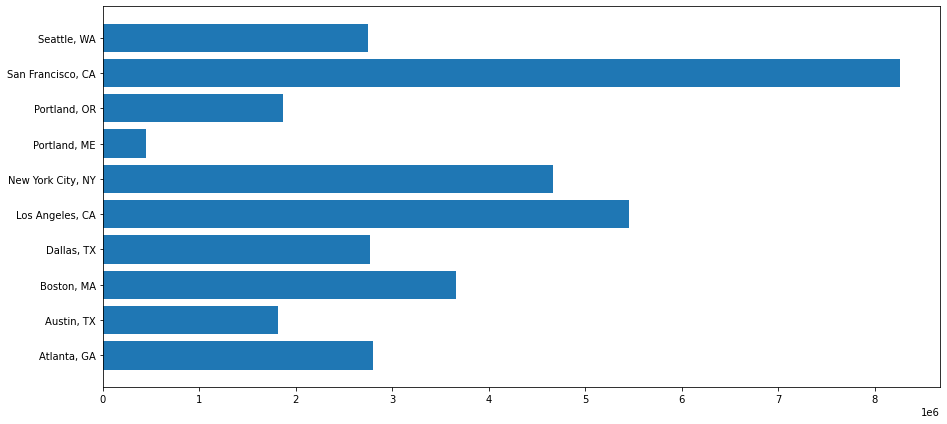

In [26]:
plt.figure(figsize=(15, 7))

plt.barh(res_city.index, res_city['sum'])